In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/drive/MyDrive/jsy/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# 1) age
# 2) sex
# 3) chest pain type (4 values)
# 4) resting blood pressure
# 5) serum cholestoral in mg/dl
# 6)fasting blood sugar > 120 mg/dl
# 7) resting electrocardiographic results (values 0,1,2)
# 8) maximum heart rate achieved
# 9) exercise induced angina
# 10) oldpeak = ST depression induced by exercise relative to rest
# 11)the slope of the peak exercise ST segment
# 12) number of major vessels (0-3) colored by flourosopy
# 13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# 14) target: 0= less chance of heart attack 1= more chance of heart attack

# 1) 연령
# 2) 성별
# 3) 흉통 유형(4 값)
# 4) 안정시 혈압
# 5) 혈청 콜레스테롤(mg/dl
# ) 6) 공복 혈당 > 120 mg/dl
# 7) 안정시 심전도 결과(값 0,1 ,2)
# 8) 달성된 최대 심박수
# 9) 운동 유발 협심증
# 10) oldpeak = 휴식에 비해 운동으로 유발된 ST 우울증
# 11) 피크 운동 ST 분절의 기울기
# 12) 주요 혈관의 수(0-3) 플루로소피
# 13) thal: 0 = 정상; 1 = 고정된 결함; 2 = 가역적 결함
# 14) 목표: 0= 심장마비의 가능성이 낮음 1= 심장마비의 가능성이 높음

In [6]:
# 1. EDA 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
# 분류 문제... 예측...
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


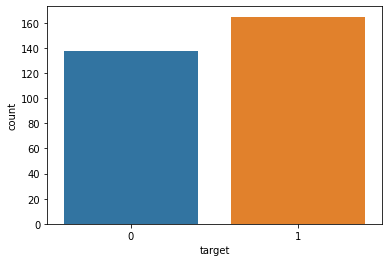

In [10]:
sns.countplot(df['target'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


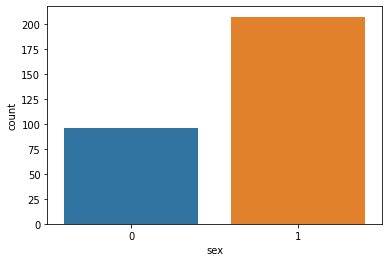

In [11]:
sns.countplot(df['sex'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


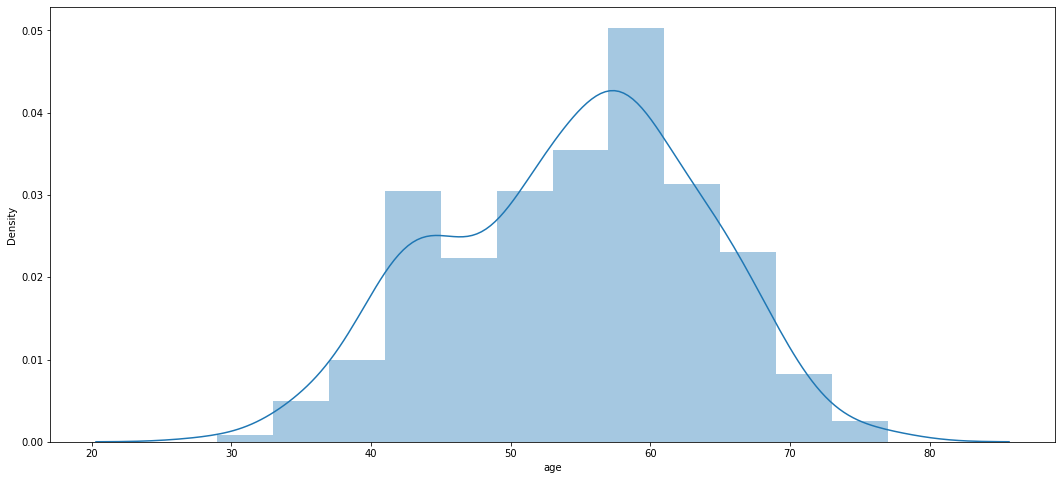

In [12]:
from IPython.core.pylabtools import figsize
# age 같은경우는 분포.... histograme
plt.subplots(figsize=(18,8))
sns.distplot(df['age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


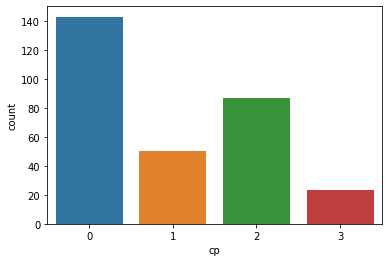

In [13]:
sns.countplot(df['cp'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


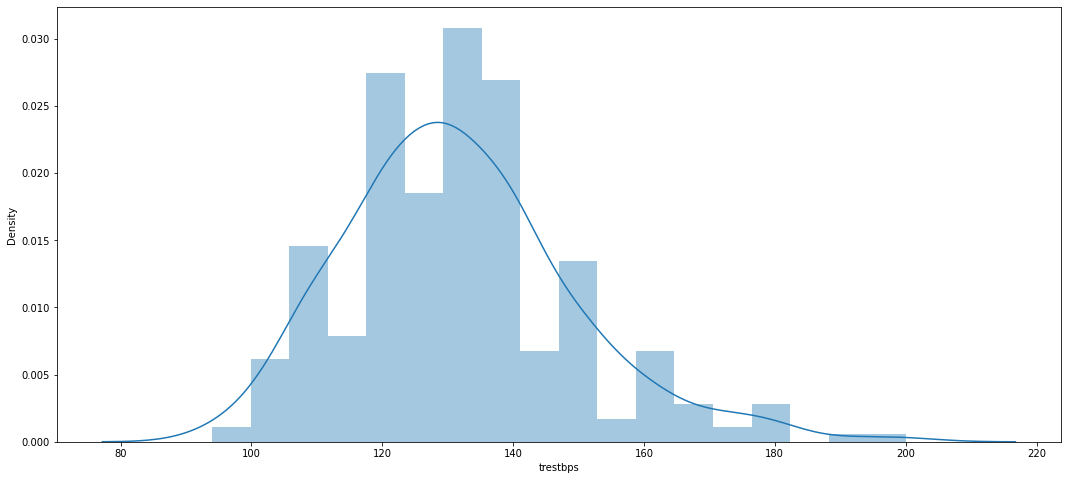

In [14]:
plt.subplots(figsize=(18,8))
sns.distplot(df['trestbps'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


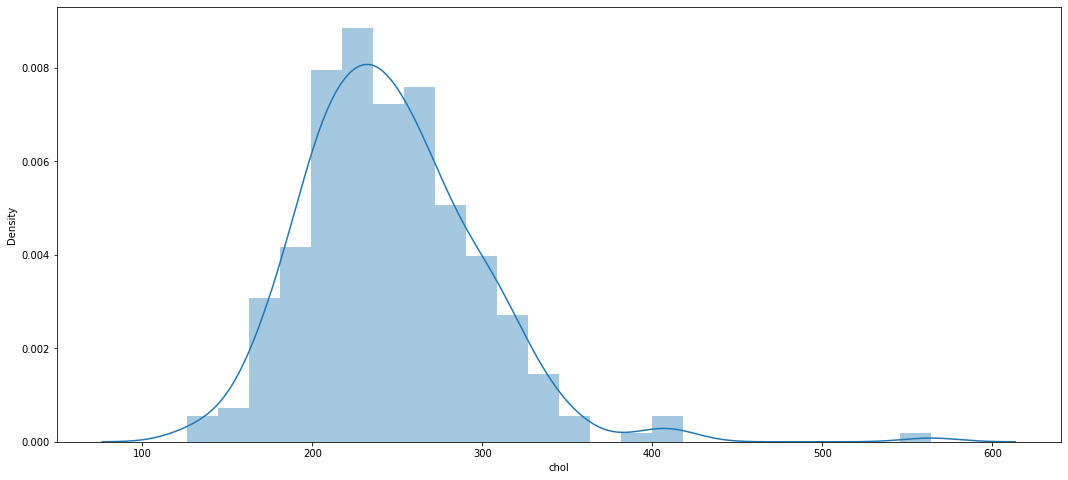

In [15]:
plt.subplots(figsize=(18,8))
sns.distplot(df['chol'])
plt.show()

In [16]:
# heat map으로 상관관계를 시각화

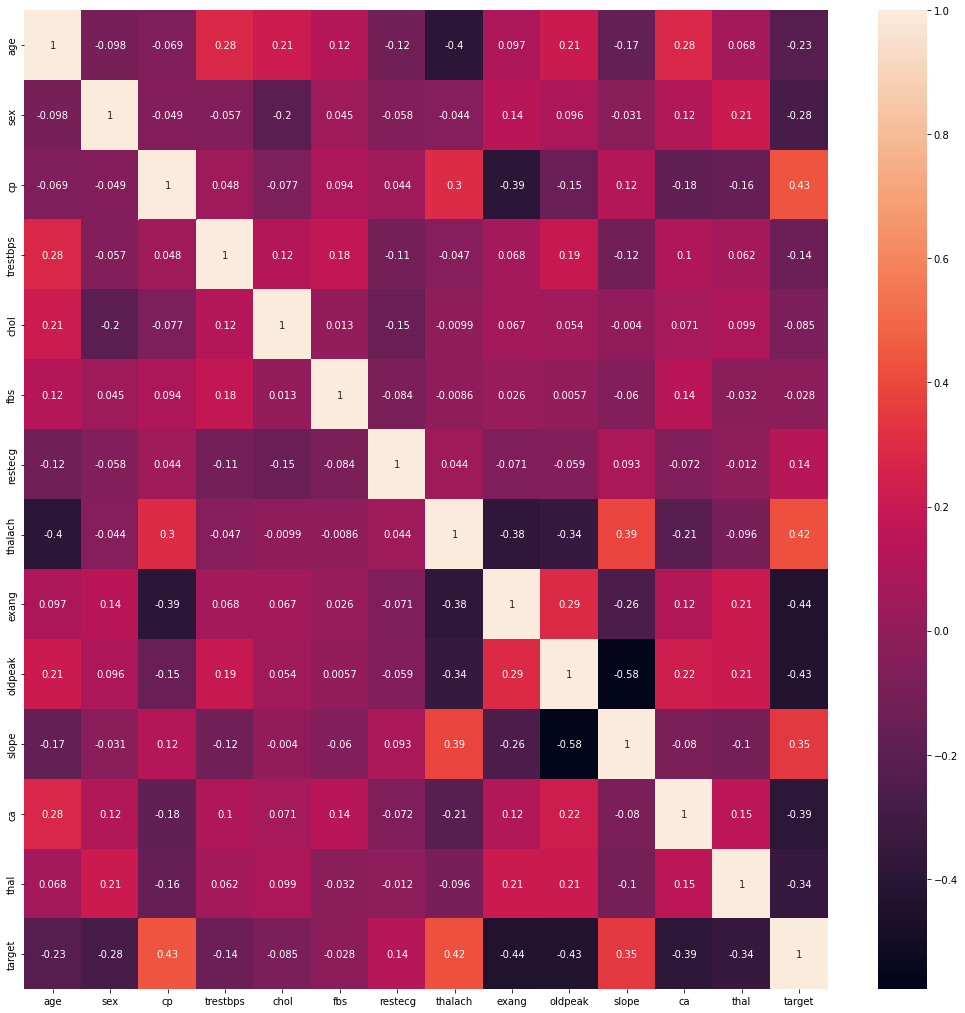

In [17]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [18]:
#np.argsort(abs(df.corr().loc[:,'target']), axis=0 )
abs(df.corr().loc[:'thal','target'])
df1 = pd.DataFrame(abs(df.corr().loc[:'thal','target']))
temp = df1.sort_values('target',ascending=False)
top5_index = temp.iloc[:5].index
top5_index

Index(['exang', 'cp', 'oldpeak', 'thalach', 'ca'], dtype='object')

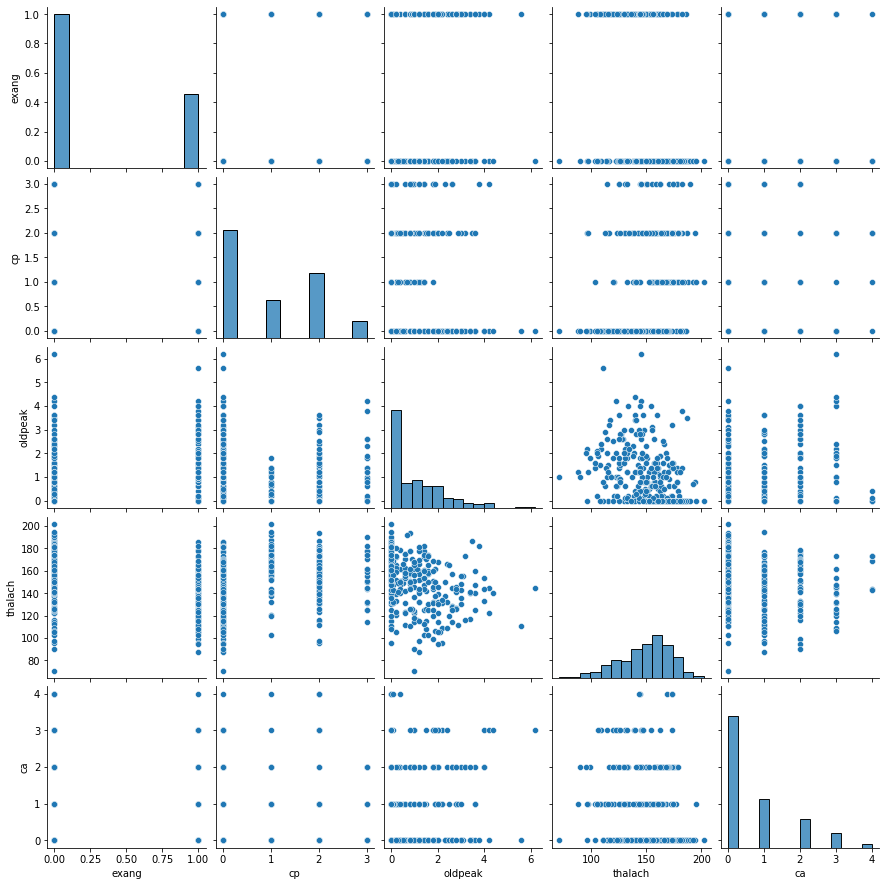

In [19]:
# sample = sns.load_dataset('iris')
# sns.pairplot(sample)
sns.pairplot(df.loc[:,top5_index])


In [20]:
#1. 모든 컬럼을 다 사용해보거나. -- target에 영향을 미치는 요인이 거의 없다..(개별변수로서..)


In [21]:
# 데이터 분할

In [22]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X.shape, Y.shape

((303, 13), (303,))

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2, random_state=32)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
# 데이터 표준화
# 1	StandardScaler	기본 스케일. 평균과 표준편차 사용
# 2	MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
# 3	MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
# 4	RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

In [74]:
from sklearn.preprocessing import RobustScaler
x_train =  RobustScaler().fit_transform(x_train)
x_test =  RobustScaler().fit_transform(x_test)

In [75]:
# 모델 선택 
# baseline model, model  -> Classfication
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_test_pred =  lr.predict(x_test)

In [76]:
# 평가
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.819672131147541

In [29]:
! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


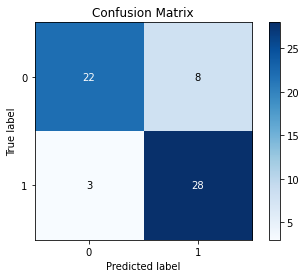

In [77]:
import scikitplot as sci
sci.metrics.plot_confusion_matrix(y_test,y_test_pred)
plt.show()
# 보고서에는 혼돈 메트릭스에 대한 정의와 수식을 적어준다.

In [31]:
# 대표값 한가전도.. Recal 계수와 F1 Score를 구한다.

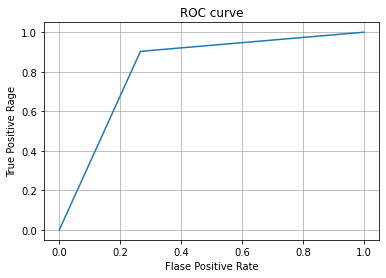

In [78]:
# Roc Curve
fpr,tpr,thresholds =  metrics.roc_curve(y_test,y_test_pred)
plt.plot(fpr,tpr)
plt.title("ROC curve")
plt.xlabel("Flase Positive Rate")
plt.ylabel('True Positive Rage')
plt.grid(True)
plt.show()

In [107]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier
tree =  DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train,y_train)
y_test_predict =  tree.predict(x_test)
metrics.accuracy_score(y_test, y_test_predict)

0.7213114754098361

In [108]:
# 트리계열은 피처공학... 중요피처를 학습결과에 따라서 점수를 부여
tree.feature_importances_

array([0.07861441, 0.05258901, 0.20088285, 0.08505185, 0.04236809,
       0.        , 0.02161458, 0.05547507, 0.05770122, 0.1176721 ,
       0.03672335, 0.12879512, 0.12251236])

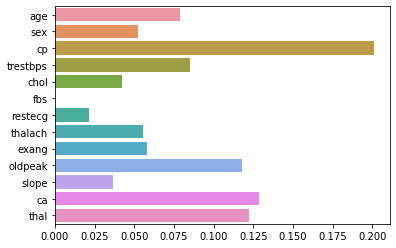

In [116]:
sns.barplot(y = X.columns, x = tree.feature_importances_ )
plt.show()

In [117]:
# RandomForest - 왜 이걸 선택했는지. 어떤 특성을가지고 있는지.  
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
y_test_pred =  rfc.predict(x_test)
metrics.accuracy_score(y_test, y_test_pred)

0.8688524590163934

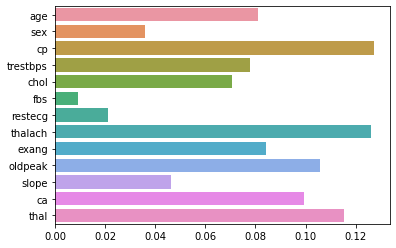

In [118]:
sns.barplot(y = X.columns, x = rfc.feature_importances_ )
plt.show()

In [128]:
# xgbooster   - 파라메터가 많음.. 대표적은 하이퍼 파라메터 튜닝 대상
from xgboost import XGBClassifier
xgb =  XGBClassifier(learning_rate=0.01, n_estimators=1000)
xgb.fit(x_train,y_train)
y_test_pred = xgb.predict(x_test)
metrics.accuracy_score(y_test, y_test_pred)

0.8524590163934426

In [102]:
from sklearn.neighbors import KNeighborsClassifier
kc =  KNeighborsClassifier(n_neighbors=5)
kc.fit(x_train,y_train)
y_test_pred = kc.predict(x_test)
metrics.accuracy_score(y_test, y_test_pred)

0.8688524590163934

In [ ]:
kc.